# Introduction

In [53]:
import os
import glob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
#list all csv files only
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['acs.csv', 'energynet.csv', 'etaz.csv', 'gaslider.csv', 'steelsoft.csv']

In [64]:
df_concat = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
df = df_concat
df

,Unnamed: 0,Brand,Model,Power,Price,Seller,Unnamed: 0.1
0,0,DAIKIN,ERLQ004CV3/EHBX04C3V,4.0,508800,ACS,NaN
1,1,DAIKIN,ERLQ006CV3/EHBX08C9W,6.0,Cena na upit,ACS,NaN
2,2,DAIKIN,ERLQ008CV3/EHVX08S18C3V,8.0,Cena na upit,ACS,NaN
3,3,DAIKIN,ERLQ011CV3/EHBX11C9W,11.0,625852,ACS,NaN
4,4,DAIKIN,ERLQ011CV3/EHVH11S26CB9W,11.0,800246,ACS,NaN
...,...,...,...,...,...,...,...
276,103,MITSUBISHI,EHST20C-YM9DR1,16.0,648720.0,Steelsoft,NaN
277,104,TRANE,RTAF310,NaN,0.0,Steelsoft,NaN
278,105,TRANE,RTAF410,NaN,0.0,Steelsoft,NaN
279,106,TRANE,025,NaN,0.0,Steelsoft,NaN


In [65]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [66]:
#droping all rows where price is 'na upit'
df.drop(df[df['Price'] == 'Cena na upit'].index, inplace = True)

C:\Users\PRECISION\AppData\Local\Temp\ipykernel_8504\4139162094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Price'] == 'Cena na upit'].index, inplace = True)


In [67]:
#format price column to float
df['Price'] = df['Price'].astype(float)

C:\Users\PRECISION\AppData\Local\Temp\ipykernel_8504\777767029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df['Price'].astype(float)


In [68]:
try:
    df['Power'] = df['Power'].astype(float)
except ValueError:
    pass

In [69]:
df

,Brand,Model,Power,Price,Seller
0,DAIKIN,ERLQ004CV3/EHBX04C3V,4.0,508800.0,ACS
3,DAIKIN,ERLQ011CV3/EHBX11C9W,11.0,625852.0,ACS
4,DAIKIN,ERLQ011CV3/EHVH11S26CB9W,11.0,800246.0,ACS
5,DAIKIN,ERLQ014CV3/EHBX16C3V,14.0,874944.0,ACS
7,DAIKIN,ERLQ014CV3/EHVX16S18C3V,14.0,1023744.0,ACS
...,...,...,...,...,...
276,MITSUBISHI,EHST20C-YM9DR1,16.0,648720.0,Steelsoft
277,TRANE,RTAF310,NaN,0.0,Steelsoft
278,TRANE,RTAF410,NaN,0.0,Steelsoft
279,TRANE,025,NaN,0.0,Steelsoft


In [70]:
df.dropna()

,Brand,Model,Power,Price,Seller
0,DAIKIN,ERLQ004CV3/EHBX04C3V,4.0,508800.0,ACS
3,DAIKIN,ERLQ011CV3/EHBX11C9W,11.0,625852.0,ACS
4,DAIKIN,ERLQ011CV3/EHVH11S26CB9W,11.0,800246.0,ACS
5,DAIKIN,ERLQ014CV3/EHBX16C3V,14.0,874944.0,ACS
7,DAIKIN,ERLQ014CV3/EHVX16S18C3V,14.0,1023744.0,ACS
...,...,...,...,...,...
272,LG,HM161MR.U34,16.0,648000.0,Steelsoft
273,LG,HM123MR.U34,12.0,648000.0,Steelsoft
274,LG,HM143MR.U34,14.0,655200.0,Steelsoft
275,LG,HM163MR.U34,16.0,669600.0,Steelsoft


### Droping all models that are water source heat pumps

In [51]:
df.query("Brand == 'LG'")

,Brand,Model,Power,Price,Seller
150,LG,HM051MR.U44,4,442190.0,Etaz
151,LG,HM071MR.U44,6,451365.0,Etaz
152,LG,HM091MR.U44,8,463931.0,Etaz
153,LG,HM121MR.U34,11,561664.0,Etaz
154,LG,HM123MR.U34,11,596169.0,Etaz
...,...,...,...,...,...
271,LG,HM141MR.U34,14.0,626400.0,Steelsoft
272,LG,HM161MR.U34,16.0,648000.0,Steelsoft
273,LG,HM123MR.U34,12.0,648000.0,Steelsoft
274,LG,HM143MR.U34,14.0,655200.0,Steelsoft


In [72]:
df = df[~df['Model'].str.contains('ACHH', na=False)]
df

,Brand,Model,Power,Price,Seller
0,DAIKIN,ERLQ004CV3/EHBX04C3V,4.0,508800.0,ACS
3,DAIKIN,ERLQ011CV3/EHBX11C9W,11.0,625852.0,ACS
4,DAIKIN,ERLQ011CV3/EHVH11S26CB9W,11.0,800246.0,ACS
5,DAIKIN,ERLQ014CV3/EHBX16C3V,14.0,874944.0,ACS
7,DAIKIN,ERLQ014CV3/EHVX16S18C3V,14.0,1023744.0,ACS
...,...,...,...,...,...
276,MITSUBISHI,EHST20C-YM9DR1,16.0,648720.0,Steelsoft
277,TRANE,RTAF310,NaN,0.0,Steelsoft
278,TRANE,RTAF410,NaN,0.0,Steelsoft
279,TRANE,025,NaN,0.0,Steelsoft


In [18]:
#df.to_csv('Heat_pumps.csv')

## EDA

### Comparing 4 kW Heat Pumps

In [78]:
power_4 = df.loc[df['Power'] == 4]
power_4 = power_4.sort_values('Price')
power_4

,Brand,Model,Power,Price,Seller
229,LG,HU051MR.U44,4.0,208800.0,Steelsoft
194,MITSUBISHI,PUHZ-SW50VKA,4.0,211680.0,Steelsoft
185,LG,HM051M.U42,4.0,388800.0,Steelsoft
160,Vaillant,35/5,4.0,406130.0,Gas_Lider
150,LG,HM051MR.U44,4,442190.0,Etaz
206,LG,HM051M.U43,4.0,453600.0,Steelsoft
267,LG,HM051MR.U44,4.0,475200.0,Steelsoft
0,DAIKIN,ERLQ004CV3/EHBX04C3V,4.0,508800.0,ACS


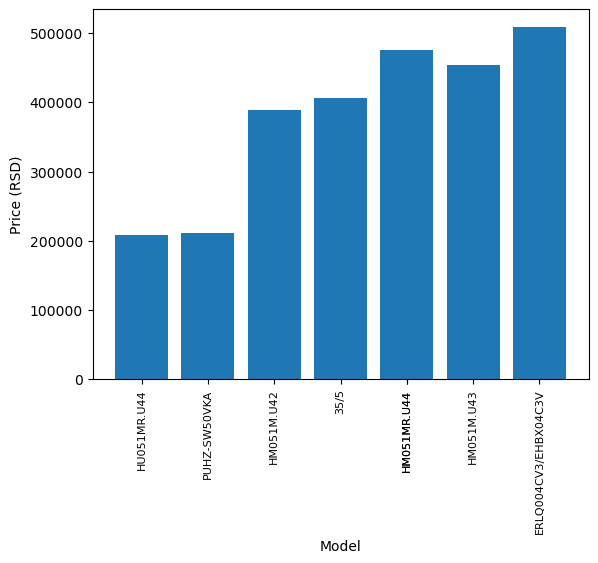

In [79]:
plt.bar(power_4['Model'],power_4['Price'])
plt.xticks(power_4['Model'], rotation='vertical', size=8)
plt.xlabel('Model')
plt.ylabel('Price (RSD)')
plt.show()

Comparing the data we can see that DAIKIN is the most expensive brand, as expected. One LG model and one Mitsubishi model that are using R410A are selling at a discounted price.

### Comparing 8 kW Heat Pumps

In [92]:
power_8 = df.loc[df['Power'] == 8]
power_8 = power_8.sort_values(by='Price')
power_8

,Brand,Model,Power,Price,Seller
47,GORENJE,80,8.0,117000.0,ACS
127,TERMAL,(200L),8.0,153264.0,ACS
168,Vaillant,75/5,8.0,194060.0,Gas_Lider
212,LG,HU091.U43,8.0,223200.0,Steelsoft
227,LG,HU091MR.U44,8.0,230400.0,Steelsoft
191,MITSUBISHI,PUHZ-SW75VHAR5,8.0,321840.0,Steelsoft
226,LG,HN0916M.NK4,8.0,331200.0,Steelsoft
262,LG,HN091MR.NK5,8.0,367200.0,Steelsoft
57,HOKKAIDO,701,8.0,369024.0,ACS
188,MITSUBISHI,PUHZ-SHW80VHAR,8.0,381600.0,Steelsoft


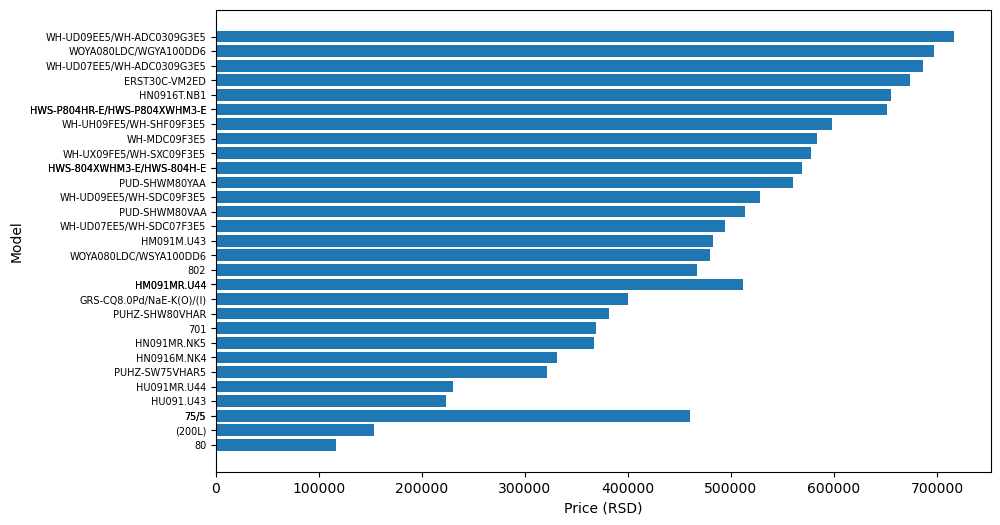

In [116]:
plt.barh(power_8['Model'],power_8['Price'])
plt.rcParams["figure.figsize"] = [10, 6]
plt.yticks(power_8['Model'], rotation='horizontal', size=7)
plt.ylabel('Model')
plt.xlabel('Price (RSD)')
plt.show()

Here we can see some unexpected results. The most expenssive brand is Panasonic. After further checking I discovered that this model have nominal capacity of 11 kW and it shoud not be in this category. Couse of this problem is bad information on ACS site.
Ignoring this problem everything is as expected. Mitsubishi is the most expenssive fallowed by Fujitsu and Toshiba.

### Compering 16 kW Heat Pumps

In [99]:
power_16 = df.loc[df['Power'] == 16]
power_16 = power_16.sort_values(by='Price')
power_16

,Brand,Model,Power,Price,Seller
119,TERMAL,(150L),16.0,144336.0,ACS
120,TERMAL,(200L),16.0,153264.0,ACS
118,TERMAL,(300L),16.0,196416.0,ACS
109,TERMAL,701,16.0,200880.0,ACS
263,LG,HN1616M.NK5,16.0,267200.0,Steelsoft
116,TERMAL,501,16.0,312480.0,ACS
173,LG,HN1616.NK1,16.0,324000.0,Steelsoft
187,LG,HU161H.U32,16.0,331200.0,Steelsoft
174,LG,HN1636.NK1,16.0,338400.0,Steelsoft
117,TERMAL,701,16.0,342240.0,ACS


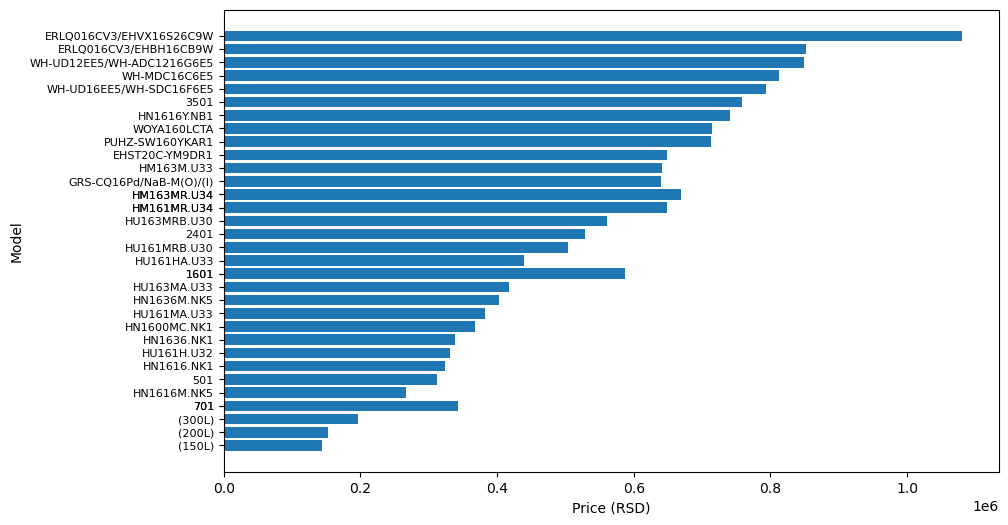

In [118]:
plt.xscale("linear")
plt.barh(power_16['Model'],power_16['Price'])
plt.yticks(power_16['Model'], rotation='horizontal', size=8)
plt.ylabel('Model')
plt.xlabel('Price (RSD)')
plt.show()

ACS has Altherma 2 model that has a 260l tank and both heating and cooling. Two reasons why this model is the most expensive can be: a) they didn't update the website b) they updated just the price and not the model name. 

Again Panasonic, Fujitsu, Mitsubishi and Daikin are on top.

# Conclsion

Based on results pulled from the websites of our greatest competitors we can conclude that Mitsubishi is our greatest competitor manufacture vise, Panasonic and Fujitsu price vise.
In 4 kW segment market is solid without big fluctuation in price.
In 8 and 16 kW segments there is a greater price range span. 

Suggested action steps:
- Adjust our price for 16 kW HP
- Start marketing campaign for 8 kW HP 

Further research needs to be done to determine why Panasonic enters the market at such high prices. Are they DAIKIN and Mitsubishi competitors regarding quality and reliability?